# Introduction

Unidentified Flying Objects (UFOs) have captivated human imagination for decades. This dataset contains 80,332 reported UFO sightings from November 11, 1906 to May 08, 2014, each a potential glimpse into the unknown. From light to triangle and circle, these reports paint a picture of mysterious encounters that challenge our understanding of the skies above. Join us as we delve into this treasure trove of data, seeking patterns in the inexplicable and giving voice to those who swear: "I saw something up there."

# Librairies

    dplyr: This library was essential for data manipulation tasks such as filtering, grouping, and summarizing our UFO sighting data.
    
    ggplot2: We used this powerful visualization library to create all of our charts and graphs, helping us to visually represent trends in UFO sightings.
    
    scales: This library complemented ggplot2 by providing additional options for customizing the scales of our plots, particularly useful for handling date and time data.
    
    readr: We used this library to efficiently read in our CSV data file containing the UFO sighting reports.


# Data's integrity 

But first, we want to have a look at the data's intergity :

1. Data Location:

    The dataset is hosted on Kaggle, titled "UFO Sightings" by NUFORC.

2. Data Organization:

    The dataset includes columns such as datetime, city, state, country, shape, duration in seconds and hours/minutes, comments, date posted, latitude, and longitude.

3. Issues with Bias or Credibility:

    Bias: The data is self-reported, introducing selection and confirmation biases.
    Credibility: The reports are unverified, making the credibility questionable.
    ROCCC Evaluation: Relevant and current, but lacks objectivity and comprehensive verification, reducing its credibility.

4. Addressing Licensing, Privacy, Security, and Accessibility:

    Licensing: Publicly available on Kaggle, compliance with terms of use is necessary.
    Privacy: Anonymized data without personal identifiers.
    Accessibility: Widely accessible to anyone with a Kaggle account.

# Overview

Now we can start with an overview of the data itself : 

To do this, I'm using R to read the CSV file and display the first few rows.

In [1]:

    # Read the CSV file
    df <- read.csv('/kaggle/input/ufo-sightings/scrubbed.csv')
    
    # Display the head of the dataframe
    print(head(df))
    

          datetime                 city state country    shape
1 10/10/1949 20:30           san marcos    tx      us cylinder
2 10/10/1949 21:00         lackland afb    tx            light
3 10/10/1955 17:00 chester (uk/england)            gb   circle
4 10/10/1956 21:00                 edna    tx      us   circle
5 10/10/1960 20:00              kaneohe    hi      us    light
6 10/10/1961 19:00              bristol    tn      us   sphere
  duration..seconds. duration..hours.min.
1               2700           45 minutes
2               7200              1-2 hrs
3                 20           20 seconds
4                 20             1/2 hour
5                900           15 minutes
6                300            5 minutes
                                                                                                                                                    comments
1                    This event took place in early fall around 1949-50. It occurred after a Boy Scout meeti

Here's a brief overview of the columns:

    datetime: The date and time of the sighting
    city: The city where the sighting occurred
    state: The state where the sighting occurred (if in the US)
    country: The country where the sighting occurred
    shape: The reported shape of the UFO
    duration (seconds): The duration of the sighting in seconds
    duration (hours/min): The duration of the sighting in hours and minutes
    comments: A description of the sighting
    date posted: The date when the sighting was reported
    latitude: The latitude of the sighting location
    longitude: The longitude of the sighting location

So, this dataset provides a good foundation for exploring UFO sighting reports, their geographical distribution, and the characteristics of the sightings. We're now ready to dive deeper into the data and explore specific topics or patterns as needed.

# Data cleaning

We now need to perform initial data cleaning and preprocessing to prepare for our analysis of UFO sightings. Let's start by cleaning the data and addressing any potential issues. We'll focus on the following steps:

    Check for missing values
    Convert data types (especially datetime and numeric columns)
    Remove any duplicate entries
    Standardize country names
    Create year and duration_minutes columns for easier time-based analysis


In [2]:

    library(dplyr)
    library(lubridate)

    # Read the CSV file
    df <- read.csv('/kaggle/input/ufo-sightings/scrubbed.csv', stringsAsFactors = FALSE)

    # Check initial dimensions
    initial_rows <- nrow(df)
    initial_cols <- ncol(df)

    # Convert datetime to proper format and extract year and month
    df$datetime <- as.POSIXct(df$datetime, format = '%m/%d/%Y %H:%M')
    df$year <- year(df$datetime)

    # Convert duration to numeric (in minutes)
    df$duration_minutes <- as.numeric(df$duration..seconds.) / 60

    # Standardize country names
    df$country[df$country == ''] <- 'unknown'
    df$country <- tolower(df$country)

    # Remove duplicates
    df <- distinct(df)

    # Check for missing values
    missing_values <- colSums(is.na(df))

    # Final dimensions
    final_rows <- nrow(df)
    final_cols <- ncol(df)

    # Print summary
    cat('Initial dimensions:', initial_rows, 'rows,', initial_cols, 'columns\
')
    cat('Final dimensions:', final_rows, 'rows,', final_cols, 'columns\
')
    cat('Rows removed:', initial_rows - final_rows, '\
')
    cat('Columns added: 2 (year and duration_minutes)\
')
    cat('Missing values per column:\
')
    print(missing_values)
    cat('\
First few rows of cleaned data:\
')
    print(head(df))
    


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Initial dimensions: 80332 rows, 11 columns
Final dimensions: 80332 rows, 13 columns
Rows removed: 0 
Columns added: 2 (year and duration_minutes)
Missing values per column:
            datetime                 city                state 
                   0                    0                    0 
             country                shape   duration..seconds. 
                   0                    0                    0 
duration..hours.min.             comments          date.posted 
                   0                    0                    0 
            latitude            longitude                 year 
                   0                    0                    0 
    duration_minutes 
                   3 

First few rows of cleaned data:
             datetime                 city state country    shape
1 1949-10-10 20:30:00           san marcos    tx      us cylinder
2 1949-10-10 21:00:00         lackland afb    tx unknown    light
3 1955-10-10 17:00:00 chester (uk/englan

Here's a summary of what we've accomplished:

    We maintained the same number of rows (80,332), indicating no duplicates were found.
    We added two new columns: 'year' and 'duration_minutes'.
    The 'datetime' column was converted to a proper datetime format.
    We standardized country names, replacing empty values with 'unknown'.

There are only 3 missing values in the 'duration_minutes' column, which is a very small proportion of our dataset. All other columns have no missing values.

The data is now clean and ready for data analysis and visualization. We have prepared the dataset to answer questions about:

    Areas with the most UFO sightings (using city, state, country, latitude, and longitude)
    Trends in UFO sightings over time (using the new 'year' and the 'month' (that we create in the following code) columns)
    Common UFO descriptions (using the 'shape' column)
    Duration of sightings (using the new 'duration_minutes' column)

Next, we can proceed with conducting data analysis and creating visualizations to answer our specific questions about UFO sightings.

# Data analysis

I'm using ggplot2 to create the vizualisations we want :

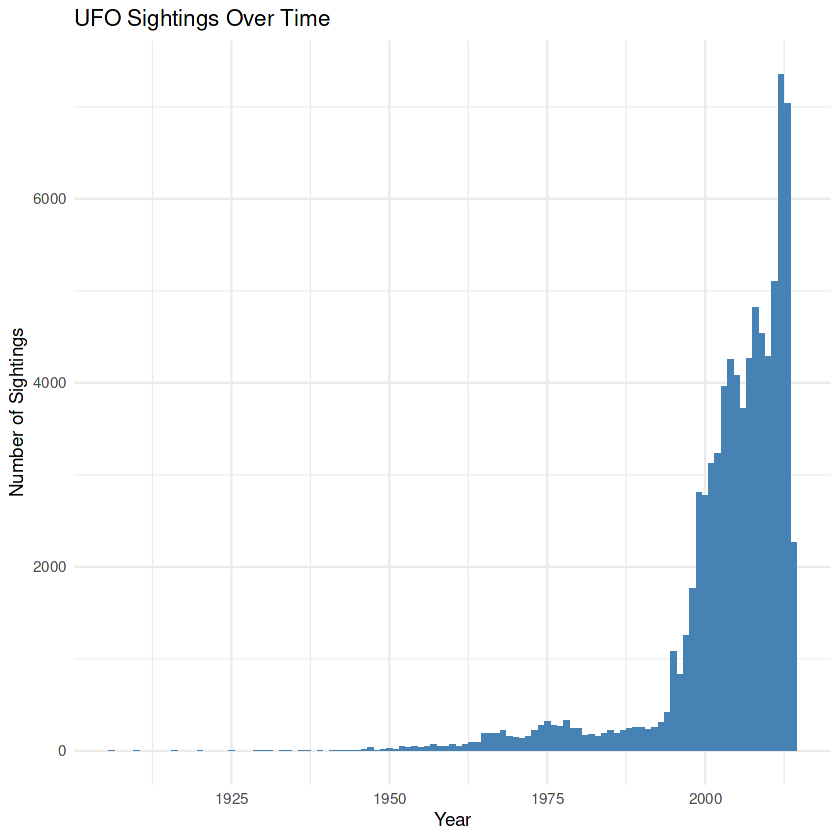

In [3]:

    library(ggplot2)
    library(dplyr)

    # Convert datetime to proper format using base R
    df$datetime <- as.POSIXct(df$datetime, format = '%m/%d/%Y %H:%M')
    df$year <- as.numeric(format(df$datetime, '%Y'))
    df$month <- as.numeric(format(df$datetime, '%m'))

    # Convert duration to numeric (in minutes) more carefully
    df$duration_minutes <- sapply(df$duration..seconds., function(x) {
        num <- as.numeric(gsub('[^0-9.]', '', x))
        if (is.na(num)) return(NA)
        return(num / 60)
    })

    # 1. UFO Sightings Over Time
    p1 <- ggplot(df, aes(x = year)) +
      geom_bar(fill = 'steelblue') +
      labs(title = 'UFO Sightings Over Time', x = 'Year', y = 'Number of Sightings') +
      theme_minimal()
    print(p1)

 

This bar chart shows the number of UFO sightings reported each year. We can observe:

    A dramatic increase in reported sightings starting from the late 1940s/early 1950s.
    A peak in sightings around the late 1990s to early 2000s.
    A slight decline in recent years, which could be due to reporting lag or changes in data collection methods.

From a human perspective, this trend could be influenced by:

    The Roswell incident in 1947, which sparked widespread public interest in UFOs.
    Increased media coverage and pop culture references to UFOs over time.
    The rise of the internet, making it easier to report sightings in the 1990s and 2000s.
    Possible changes in social attitudes or reporting mechanisms in recent years.


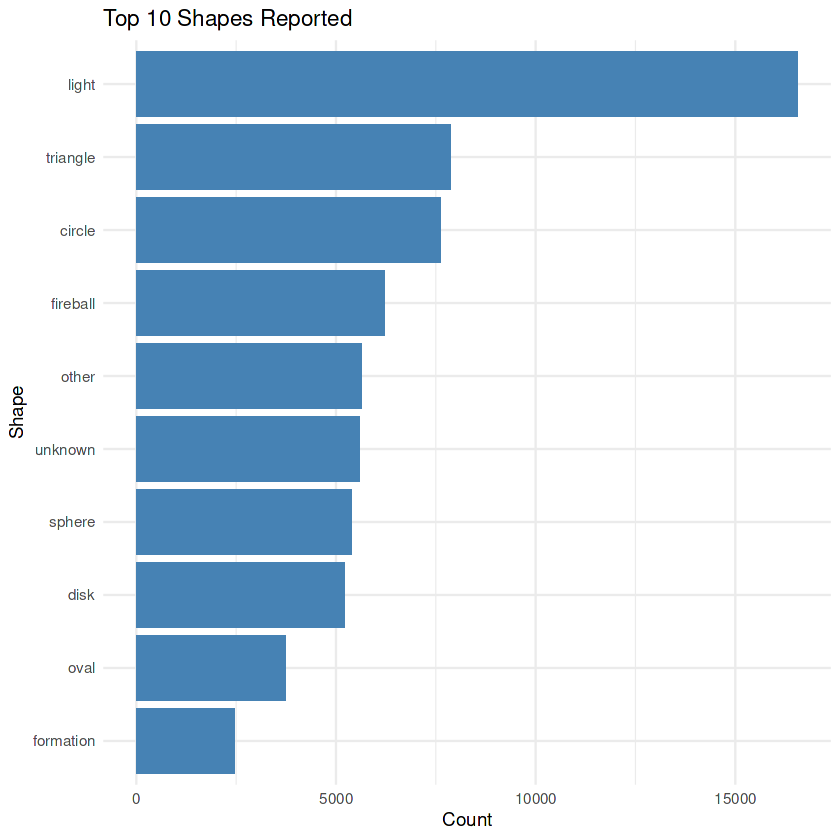

In [4]:
   # 2. Top 10 Shapes Reported
    shape_counts <- df %>%
      count(shape) %>%
      arrange(desc(n)) %>%
      head(10)
    
    p2 <- ggplot(shape_counts, aes(x = reorder(shape, n), y = n)) +
      geom_bar(stat = 'identity', fill = 'steelblue') +
      coord_flip() +
      labs(title = 'Top 10 Shapes Reported', x = 'Shape', y = 'Count') +
      theme_minimal()
    print(p2)

This horizontal bar chart displays the most commonly reported UFO shapes:

    "Light" is by far the most common description, which is intriguing.
    Geometric shapes like "triangle" and "circle" are also frequently reported.
    "Fireball" and "sphere" suggest luminous, round objects.
    "Other" and "unknown" indicate that many sightings don't fit conventional categories.

Human interpretation:

    The prevalence of "light" could be due to the difficulty in discerning shapes at night or at a distance.
    Geometric shapes might be easier for the human brain to categorize and remember.
    The variety of shapes suggests a diverse range of phenomena or perceptions.


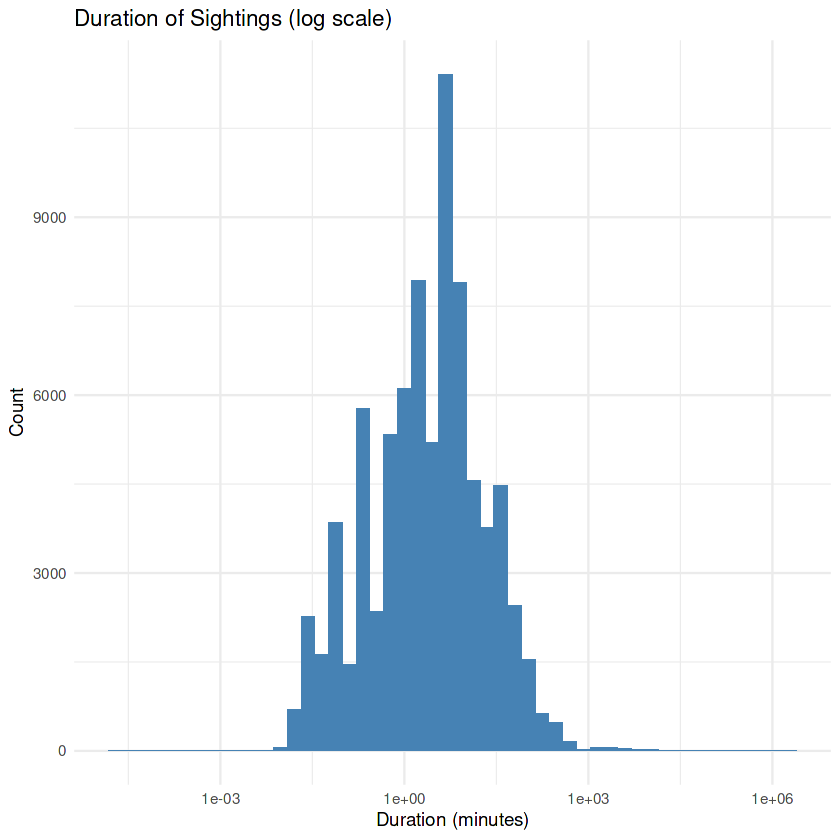

In [5]:
    # 3. Duration of Sightings
    p3 <- ggplot(df, aes(x = duration_minutes)) +
      geom_histogram(bins = 50, fill = 'steelblue') +
      scale_x_log10() +
      labs(title = 'Duration of Sightings (log scale)', x = 'Duration (minutes)', y = 'Count') +
      theme_minimal()
    print(p3)

This histogram shows the distribution of sighting durations on a logarithmic scale:

    Most sightings are clustered on the left, indicating short durations.
    There's a long tail to the right, representing fewer but much longer sightings.
    The log scale suggests a wide range of durations, from seconds to hours or even days.

Human factors to consider:

    Short sightings could be due to fleeting glimpses or rapidly moving objects.
    Longer durations might represent stationary phenomena or extended observations.
    The log distribution could reflect the variability in human perception and attention span.


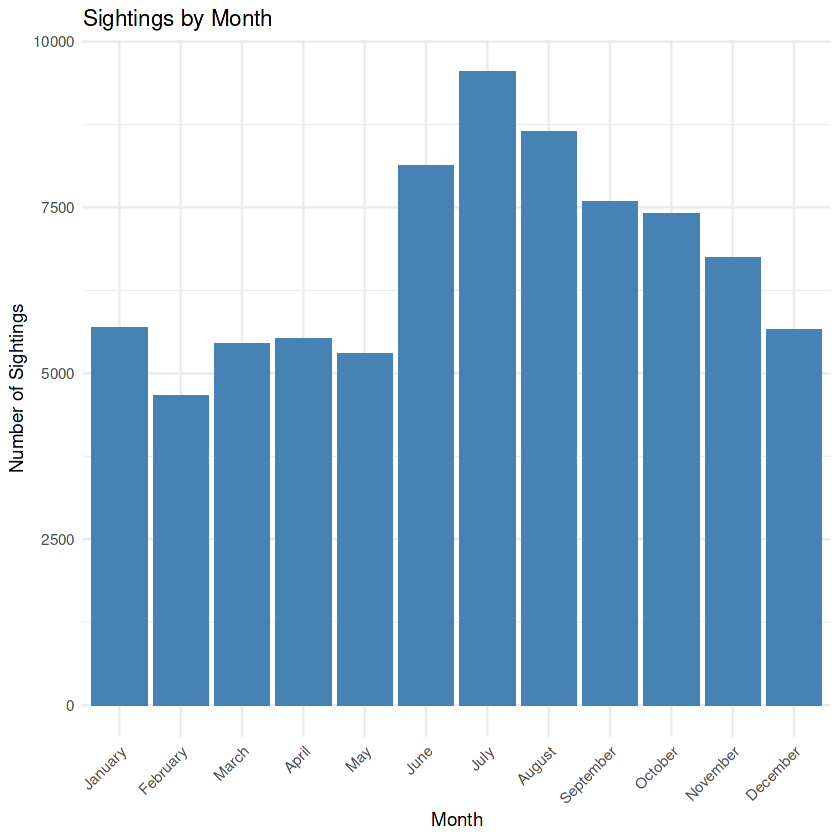

In [6]:
  # 4. Sightings by Month
    month_counts <- df %>%
      count(month) %>%
      mutate(month_name = month.name[month])
    
    p4 <- ggplot(month_counts, aes(x = factor(month_name, levels = month.name), y = n)) +
      geom_bar(stat = 'identity', fill = 'steelblue') +
      labs(title = 'Sightings by Month', x = 'Month', y = 'Number of Sightings') +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
    print(p4)

This bar chart shows the number of UFO sightings reported in each month:

    There's a clear peak in sightings during the summer months, particularly July.
    Winter months have fewer reported sightings.
    A gradual increase from January to July, then a decrease from August to December.

Human behavior and environmental factors that might explain this:

    More people are outdoors during summer evenings, increasing the chance of sightings.
    Longer daylight hours in summer might contribute to more observable phenomena.
    Winter weather and shorter days could reduce outdoor activities and visibility.
    Holidays and vacations in July might lead to more sky-watching and reporting.


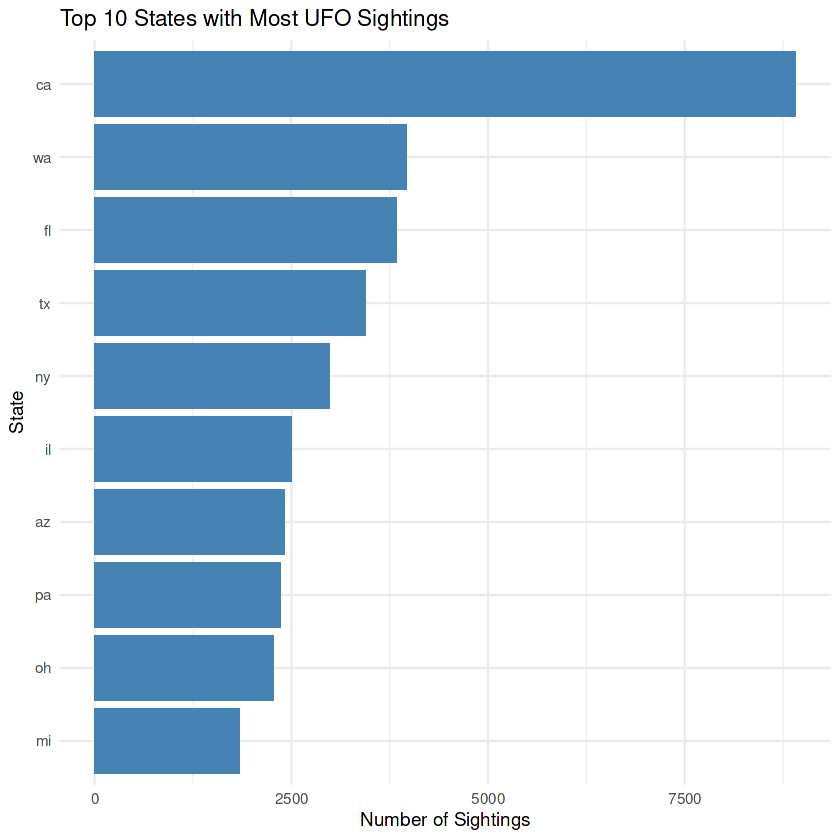

In [7]:
    # 5. Top 10 States with Most UFO Sightings
    state_counts <- df %>%
      filter(country == 'us') %>%
      count(state) %>%
      arrange(desc(n)) %>%
      head(10)

    p5 <- ggplot(state_counts, aes(x = reorder(state, n), y = n)) +
      geom_bar(stat = 'identity', fill = 'steelblue') +
      coord_flip() +
      labs(title = 'Top 10 States with Most UFO Sightings', x = 'State', y = 'Number of Sightings') +
      theme_minimal()
    print(p5)


This bar chart shows the top 10 states with the most reported UFO sightings:

    California dominance: California (CA) leads by a significant margin with 8,912 reported sightings. This is more than double the number of sightings in the second-ranked state.

    West Coast prominence: Two of the top three states (California and Washington) are on the West Coast. This could be due to several factors:
        Large populations and major urban centers
        Clear skies and good visibility in many areas
        Proximity to military and aerospace facilities

    Population correlation: There seems to be a correlation between population size and the number of sightings. States like California, Florida, Texas, and New York are among the most populous in the US.

    Cultural factors: Some states, like Washington, have a strong association with UFO culture (e.g., Roswell in New Mexico, though it's not in the top 6). This could influence reporting rates.

    Environmental considerations: States with diverse landscapes, including coastlines, mountains, and deserts (like California) might provide more opportunities for unusual atmospheric phenomena that could be interpreted as UFO sightings.

    Reporting mechanisms: The variation in sighting numbers could also be influenced by differences in local reporting systems or the presence of active UFO research groups in certain states.

This geographical distribution adds another layer to our understanding of UFO sighting patterns. It suggests that while temporal factors (as seen in our previous time-based analyses) play a role, spatial factors are also significant in the distribution of UFO reports.

# Conclusion

These patterns suggest that UFO sightings are influenced by a complex interplay of factors including population density, geographical features, seasonal conditions, and possibly cultural or social factors. While many sightings might have conventional explanations, the consistency in some reported shapes and the wide distribution across states indicate a phenomenon worthy of continued study.

This analysis not only sheds light on the nature of UFO sightings but also provides a fascinating window into the workings of the human mind. It demonstrates how our perceptual systems, cognitive biases, and cultural context shape our interpretation of unusual or ambiguous phenomena. Understanding these psychological factors is crucial for a comprehensive study of UFO sightings and highlights the need for interdisciplinary approaches in investigating such phenomena.